## MSDS 7331 - Case Study 7 - Minimizing Monetary Loss Using a Cost Matrix
Daniel Crouthamel

Sophia Wu

Fabio Savorgnan

Bo Yun

# Introduction

You should always state the objective at the beginning of every case (a guideline you should follow in real life as well) and provide some initial "Business Understanding" statements (i.e., what is trying to be solved for and why might it be important)

# Data Engineering and Analysis

Summarize the data being used in the case using appropriate mediums (charts, graphs, tables); address questions such as: Are there missing values? Which variables are needed (which ones are not)? What assumptions or conclusions are you drawing that need to be relayed to your audience?

In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

df = pd.read_csv('data/final_project(5).csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [2]:
df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21

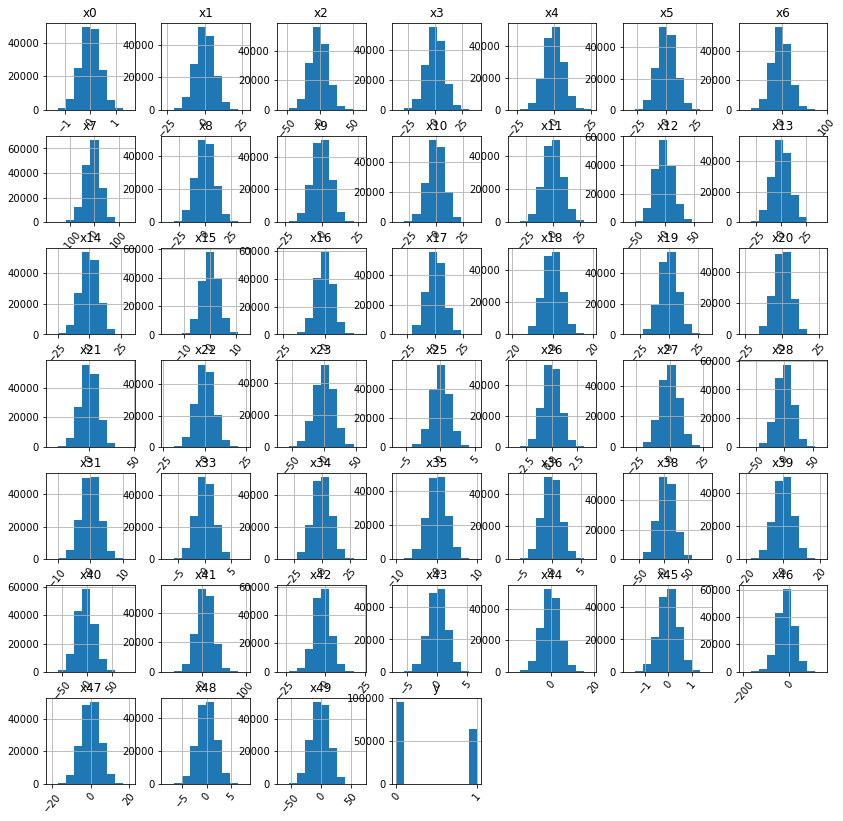

In [3]:
df.hist(figsize=(14,14), xrot=50)

In [4]:
cat_with_target = df.select_dtypes(include=['object', 'int64']).columns.tolist()
df[cat_with_target].sample(10)

,x24,x29,x30,x32,x37,y
47612,asia,July,wednesday,-0.0%,$-386.35,0
140827,asia,Jun,wednesday,-0.01%,$716.54,0
59062,asia,May,wednesday,-0.01%,$-625.64,1
146663,asia,sept.,wednesday,0.01%,$-1024.82,0
71408,asia,Aug,wednesday,-0.02%,$860.81,0
14344,asia,Jun,wednesday,0.0%,$-1354.99,0
106379,asia,sept.,tuesday,0.0%,$-1312.84,0
57604,asia,sept.,wednesday,-0.0%,$-260.97,0
136151,asia,sept.,tuesday,0.01%,$-921.73,0
141580,euorpe,July,wednesday,-0.02%,$2548.83,1


In [5]:
df['x24'].value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [6]:
df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [7]:
df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

## Note, going to make x32 item enum/categorical, see below

Also dropping NAs

In [8]:
df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['x24'] = df['x24'].astype('category')
df['x29'] = df['x29'].astype('category')
df['x30'] = df['x30'].astype('category')

df['x32'] = [float(x.replace('%','')) for x in df['x32']]
df['x32'] = df['x32'].astype('category')

df['x37'] = [float(x.replace('$','')) for x in df['x37']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      158392 non-null  float64 
 1   x1      158392 non-null  float64 
 2   x2      158392 non-null  float64 
 3   x3      158392 non-null  float64 
 4   x4      158392 non-null  float64 
 5   x5      158392 non-null  float64 
 6   x6      158392 non-null  float64 
 7   x7      158392 non-null  float64 
 8   x8      158392 non-null  float64 
 9   x9      158392 non-null  float64 
 10  x10     158392 non-null  float64 
 11  x11     158392 non-null  float64 
 12  x12     158392 non-null  float64 
 13  x13     158392 non-null  float64 
 14  x14     158392 non-null  float64 
 15  x15     158392 non-null  float64 
 16  x16     158392 non-null  float64 
 17  x17     158392 non-null  float64 
 18  x18     158392 non-null  float64 
 19  x19     158392 non-null  float64 
 20  x20     158392 non-null  f

In [10]:
df['x32'].value_counts()

0.0      63780
0.01     40367
-0.01    33771
-0.02     9812
0.02      7911
-0.03     1709
0.03       845
-0.04      136
0.04        54
-0.05        6
0.05         1
Name: x32, dtype: int64

In [11]:
categorical_features = ['x24', 'x29', 'x30', 'x32']

cat_with_target = ['x24', 'x29', 'x30', 'x32', 'y']

numeric_features = [x for x in df.columns.values.tolist() if x not in cat_with_target]

In [12]:
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   x0                  158392 non-null  float64
 1   x1                  158392 non-null  float64
 2   x2                  158392 non-null  float64
 3   x3                  158392 non-null  float64
 4   x4                  158392 non-null  float64
 5   x5                  158392 non-null  float64
 6   x6                  158392 non-null  float64
 7   x7                  158392 non-null  float64
 8   x8                  158392 non-null  float64
 9   x9                  158392 non-null  float64
 10  x10                 158392 non-null  float64
 11  x11                 158392 non-null  float64
 12  x12                 158392 non-null  float64
 13  x13                 158392 non-null  float64
 14  x14                 158392 non-null  float64
 15  x15                 158392 non-nul

# Modeling Preparations

Which methods are you proposing to utilize to solve the problem?  Why is this method appropriate given the business objective? How will you determine if your approach is useful (or how will you differentiate which approach is more useful than another)?  More specifically, what evaluation metrics are most useful given that the problem is a binary-classification one (ex., Accuracy, F1-score, Precision, Recall, AUC, etc.)?

Fill in - Need to explain how we used H2O to find optimal models, choose GBM, etc.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier 


# One-hot encoding of categorical variables
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

#dum_df = dum_df.sample(frac=.01)

X = dum_df.loc[:, dum_df.columns != 'y']

y = dum_df['y']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

model = GradientBoostingClassifier(n_estimators=145, max_depth=14, min_samples_leaf=30)

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.948925155465766


In [ ]:
# This takes about an hour to run, checking cross-validation scores

# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Model Building & Evaluation

"In this case, your primary task is to train a model (or models) capable of generalizing on a binary-target that will minimize the monetary loss for your customer and will involve the following steps:

- Specify your sampling methodology
- Setup your model(s) - highlighting any important parameters
- Analyze the performance of your model(s) - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)"

## Confusion Matrix Test

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

[[18289   681]
 [  937 11772]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     18970
           1       0.95      0.93      0.94     12709

    accuracy                           0.95     31679
   macro avg       0.95      0.95      0.95     31679
weighted avg       0.95      0.95      0.95     31679



## Confusion Matrix Train

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train, model.predict(X_train)))
print(classification_report(y_train, model.predict(X_train)))

[[75876     0]
 [    0 50837]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75876
           1       1.00      1.00      1.00     50837

    accuracy                           1.00    126713
   macro avg       1.00      1.00      1.00    126713
weighted avg       1.00      1.00      1.00    126713



# Monetary Outcome

What is the expected monetary cost (or loss) associated with your model and how might you best translate this to your customer?  Remember, predicting class 1 incorrectly costs the customer $100 while incorrectly predicting class 0 costs the customer $25; or said another way, False Positives = -$100 and False Negatives = -$25


Computate proabilities, and then compute cost for each threshold.

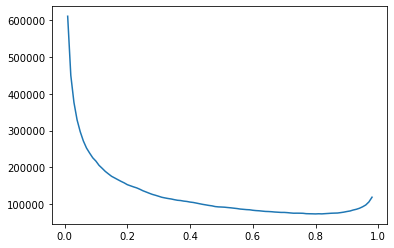

In [16]:
import matplotlib.pyplot as plt

def compute_costs(thresholds, y_prob, y_true):
    all_costs = []

    for x in thresholds:
        cost = 0

        y_map = np.where(y_prob > x, 1, 0)

        for i in range(len(y_map)):
            
            # Cost of False Positive
            if y_map[i] - y_true[i] == 1:
                cost = cost + 100
                
            # Cose of False Negative
            elif y_map[i] - y_true[i] == -1:
                cost = cost + 25

        all_costs.append(cost)

    return all_costs

y_prob = model.predict_proba(X_test)[:,1]
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob, y_test.values)

plt.plot(thresholds, costs)

## Find Min Cost, Threshold and Cost Per Sample for Test Set

In [18]:
min_idx = np.argmin(costs)
print("Min Cost of", costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y_test))

Min Cost of 72750 occurs at threshold 0.8
Cost per sample: 2.2964740048612646


## Costs across all samples

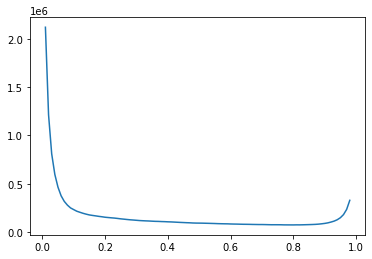

In [19]:
y_prob = model.predict_proba(X)[:,1]
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob, y.values)

plt.plot(thresholds, costs)

## Find Min Cost, Threshold and Cost Per Sample for Entire Set

In [20]:
min_idx = np.argmin(costs)
print("Min Cost of", costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y))

Min Cost of 72925 occurs at threshold 0.8
Cost per sample: 0.4604083539572706


# Case Conclusions

You have a wide range of formatting options to use (Jupyter Notebook, PDF report, Word Doc, Slide Deck, etc.), but ultimately, you are going to put one thing in your audience's hand first - be thoughtful about what they need to see and why - reports that are too long will likely distract from the main story and reports that are too short are likely to lack important details (you'll need to balance this for each case)

# Extra stuff if needed

In [ ]:
import h2o
from h2o.automl import H2OAutoML

try:
    h2o.cluster().shutdown()
    h2o.init()
except:
    h2o.init()

In [28]:
import lightgbm

gbm = lightgbm.LGBMClassifier(n_estimators=145, max_depth=14, min_samples_leaf=30)

gbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

y_pred_light = gbm.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=30. Current value: min_data_in_leaf=30
[1]	valid_0's binary_logloss: 0.643329
[2]	valid_0's binary_logloss: 0.616331
[3]	valid_0's binary_logloss: 0.592686
[4]	valid_0's binary_logloss: 0.573088
[5]	valid_0's binary_logloss: 0.556293
[6]	valid_0's binary_logloss: 0.539638
[7]	valid_0's binary_logloss: 0.526062
[8]	valid_0's binary_logloss: 0.513368
[9]	valid_0's binary_logloss: 0.499837
[10]	valid_0's binary_logloss: 0.489485
[11]	valid_0's binary_logloss: 0.479113
[12]	valid_0's binary_logloss: 0.469441
[13]	valid_0's binary_logloss: 0.459501
[14]	valid_0's binary_logloss: 0.450584
[15]	valid_0's binary_logloss: 0.443017
[16]	valid_0's binary_logloss: 0.434817
[17]	valid_0's binary_logloss: 0.426088
[18]	valid_0's binary_logloss: 0.419359
[19]	valid_0's binary_logloss: 0.413332
[20]	valid_0's binary_logloss: 0.406681
[21]	valid_0's binary_logloss: 0.398082
[22]	valid_0's bina

In [31]:
print(confusion_matrix(y, gbm.predict(X)))

[[89829  5017]
 [ 7184 56362]]


In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

root_logdir = os.path.join(os.curdir, "my_logs_case7")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

X = dum_df.loc[:, dum_df.columns != 'y']

y = dum_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2                                                    

final_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(77,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir())

safety = EarlyStopping(monitor='val_loss', patience=3, min_delta=2e-4)

final_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), 
          callbacks=[tensorboard_cb, safety], batch_size=100)

final_model.evaluate(X_val, y_val, batch_size=100)

Epoch 1/100
951/951 [==============================] - 6s 5ms/step - loss: 1.1478 - accuracy: 0.6351 - val_loss: 0.4971 - val_accuracy: 0.7656
Epoch 2/100
951/951 [==============================] - 4s 4ms/step - loss: 0.4662 - accuracy: 0.7799 - val_loss: 0.3686 - val_accuracy: 0.8471
Epoch 3/100
951/951 [==============================] - 4s 4ms/step - loss: 0.3640 - accuracy: 0.8416 - val_loss: 0.2903 - val_accuracy: 0.8756
Epoch 4/100
951/951 [==============================] - 4s 4ms/step - loss: 0.3047 - accuracy: 0.8722 - val_loss: 0.2400 - val_accuracy: 0.9038
Epoch 5/100
951/951 [==============================] - 4s 4ms/step - loss: 0.2557 - accuracy: 0.8966 - val_loss: 0.2122 - val_accuracy: 0.9185
Epoch 6/100
951/951 [==============================] - 4s 4ms/step - loss: 0.2224 - accuracy: 0.9136 - val_loss: 0.1758 - val_accuracy: 0.9330
Epoch 7/100
951/951 [==============================] - 4s 5ms/step - loss: 0.2034 - accuracy: 0.9225 - val_loss: 0.1687 - val_accuracy: 0.9373

[0.1244436576962471, 0.9604154229164124]

In [22]:
y_pred_val = (final_model.predict(X_val) > 0.5).astype('int32')

print(confusion_matrix(y_val, y_pred_val))

[[18424   535]
 [  719 12001]]


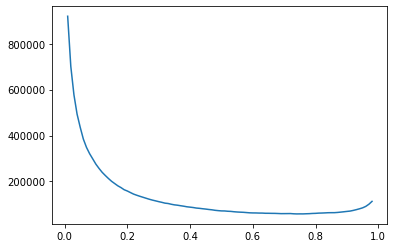

In [23]:
# With tensor flow, use predict_proba is deprecated
y_prob = final_model.predict(X_val)
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob, y_val.values)

plt.plot(thresholds, costs)

In [24]:
min_idx = np.argmin(costs)
print("Min Cost of",costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y_val))

Min Cost of 58350 occurs at threshold 0.74
Cost per sample: 1.8419142018371792


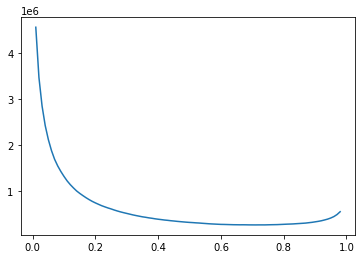

In [25]:
y_prob = final_model.predict(X)
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob, y.values)

plt.plot(thresholds, costs)

In [26]:
min_idx = np.argmin(costs)
print("Min Cost of",costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y))

Min Cost of 252850 occurs at threshold 0.7100000000000001
Cost per sample: 1.5963558765594221
